In [1]:
from sklearn.datasets import load_iris
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\ranab\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
df.head(5)
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [4]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
X=df.describe()   #Statistical model of our dataset.
X.style.background_gradient(cmap = "YlGn")

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.000000,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.000000,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.000000,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.000000,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

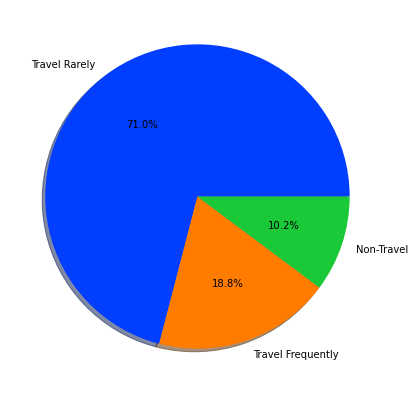

In [8]:
C = df['BusinessTravel'].value_counts()
colors = sns.color_palette('bright')
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
plt.pie(x=C,labels=['Travel Rarely','Travel Frequently','Non-Travel'],shadow=True,autopct='%1.1f%%',colors=colors)
C

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

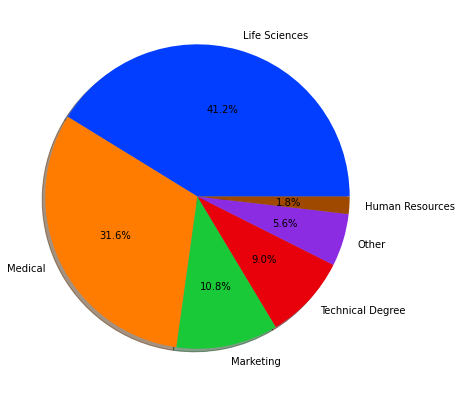

In [9]:
C = df['EducationField'].value_counts()
colors = sns.color_palette('bright')
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
plt.pie(x=C,labels=['Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'],shadow=True,autopct='%1.1f%%',colors=colors)
C

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

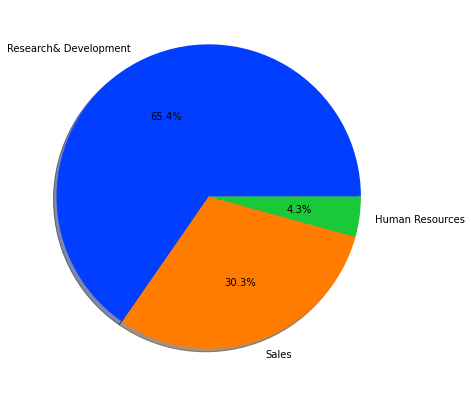

In [10]:
C = df['Department'].value_counts()
colors = sns.color_palette('bright')
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
plt.pie(x=C,labels=['Research& Development','Sales','Human Resources'],shadow=True,autopct='%1.1f%%',colors=colors)
C

<AxesSubplot:>

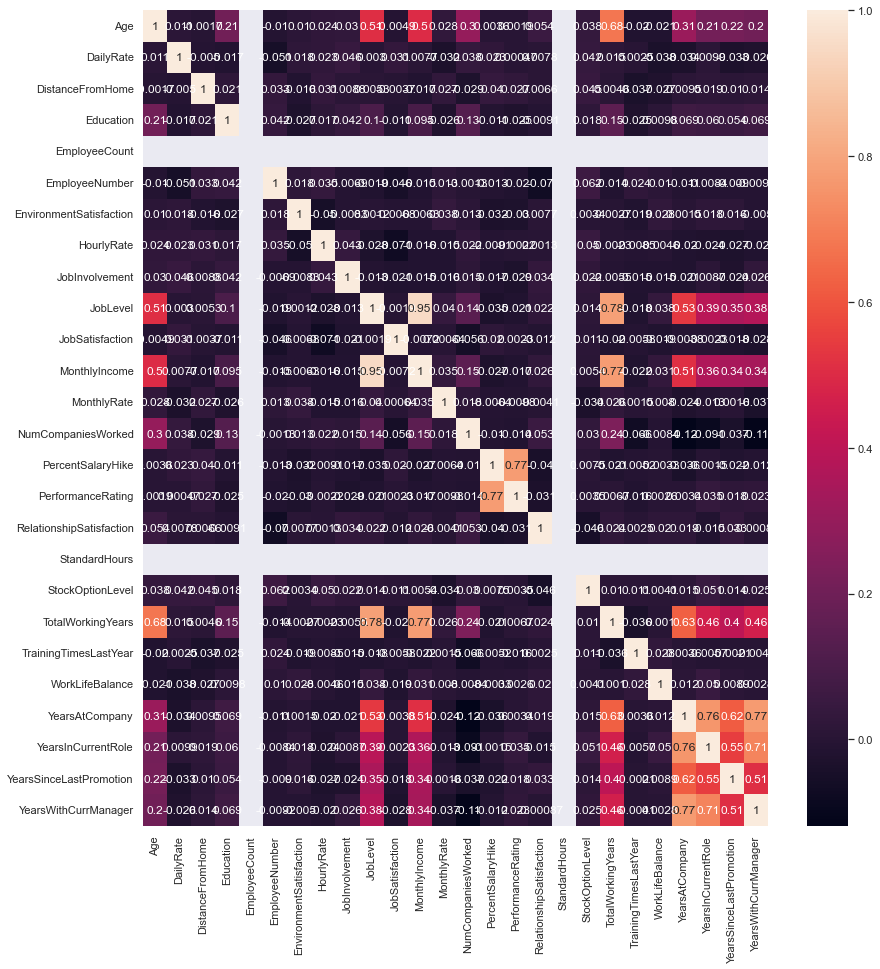

In [11]:
plt.figure()                                             #heatmap displaying correlation among all attributes.
cor = df.corr()
fig = plt.gcf()
fig.set_size_inches(14,15)
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(cor,annot=True)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
L = LabelEncoder()
df['Attrition'] = L.fit_transform(df['Attrition'])
df['BusinessTravel'] = L.fit_transform(df['BusinessTravel'])
df['Department'] = L.fit_transform(df['Department'])
df['EducationField'] = L.fit_transform(df['EducationField'])
df['Gender'] = L.fit_transform(df['Gender'])
df['JobRole'] = L.fit_transform(df['JobRole'])
df['MaritalStatus'] = L.fit_transform(df['MaritalStatus'])
df['Over18'] = L.fit_transform(df['Over18'])
df['OverTime'] = L.fit_transform(df['OverTime'])

<AxesSubplot:>

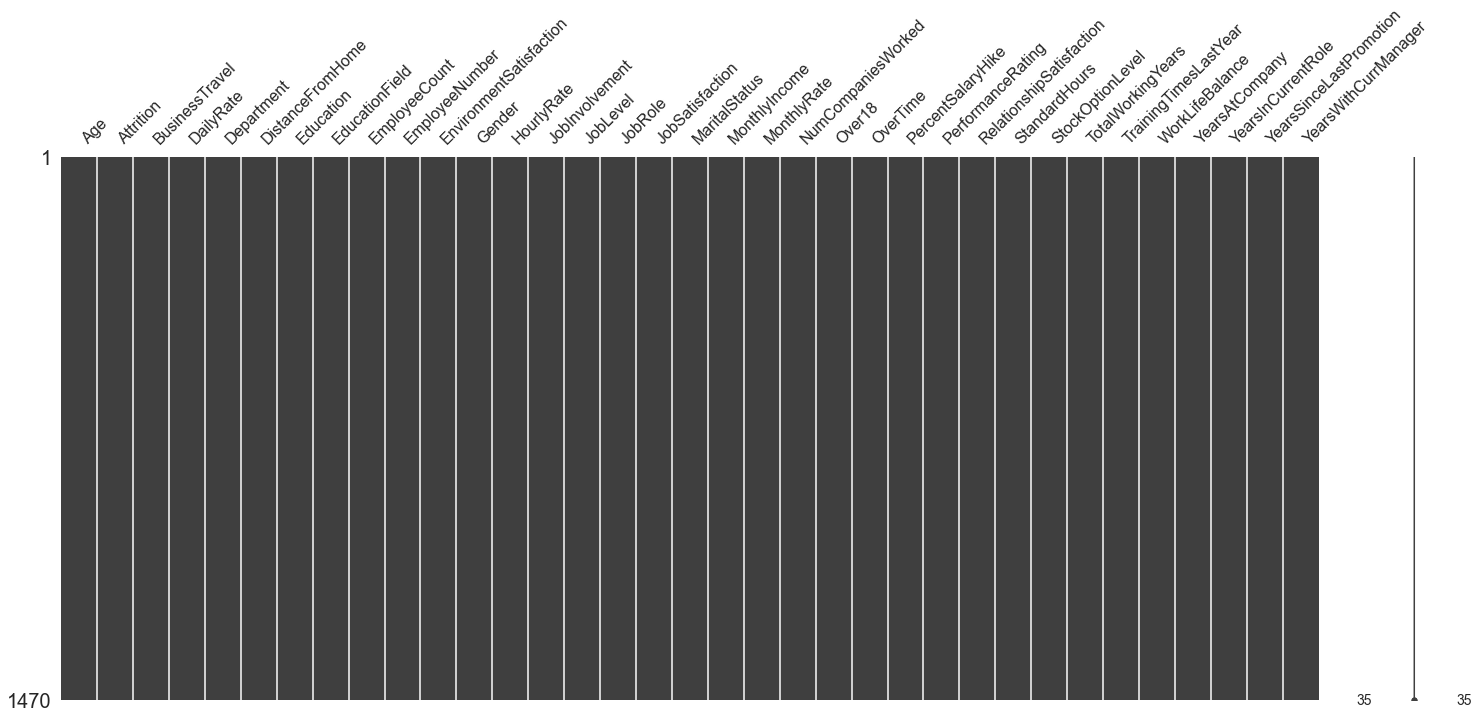

In [14]:
import missingno                   #the white line in the matrix drawn below is the null values.
missingno.matrix(df)

<AxesSubplot:>

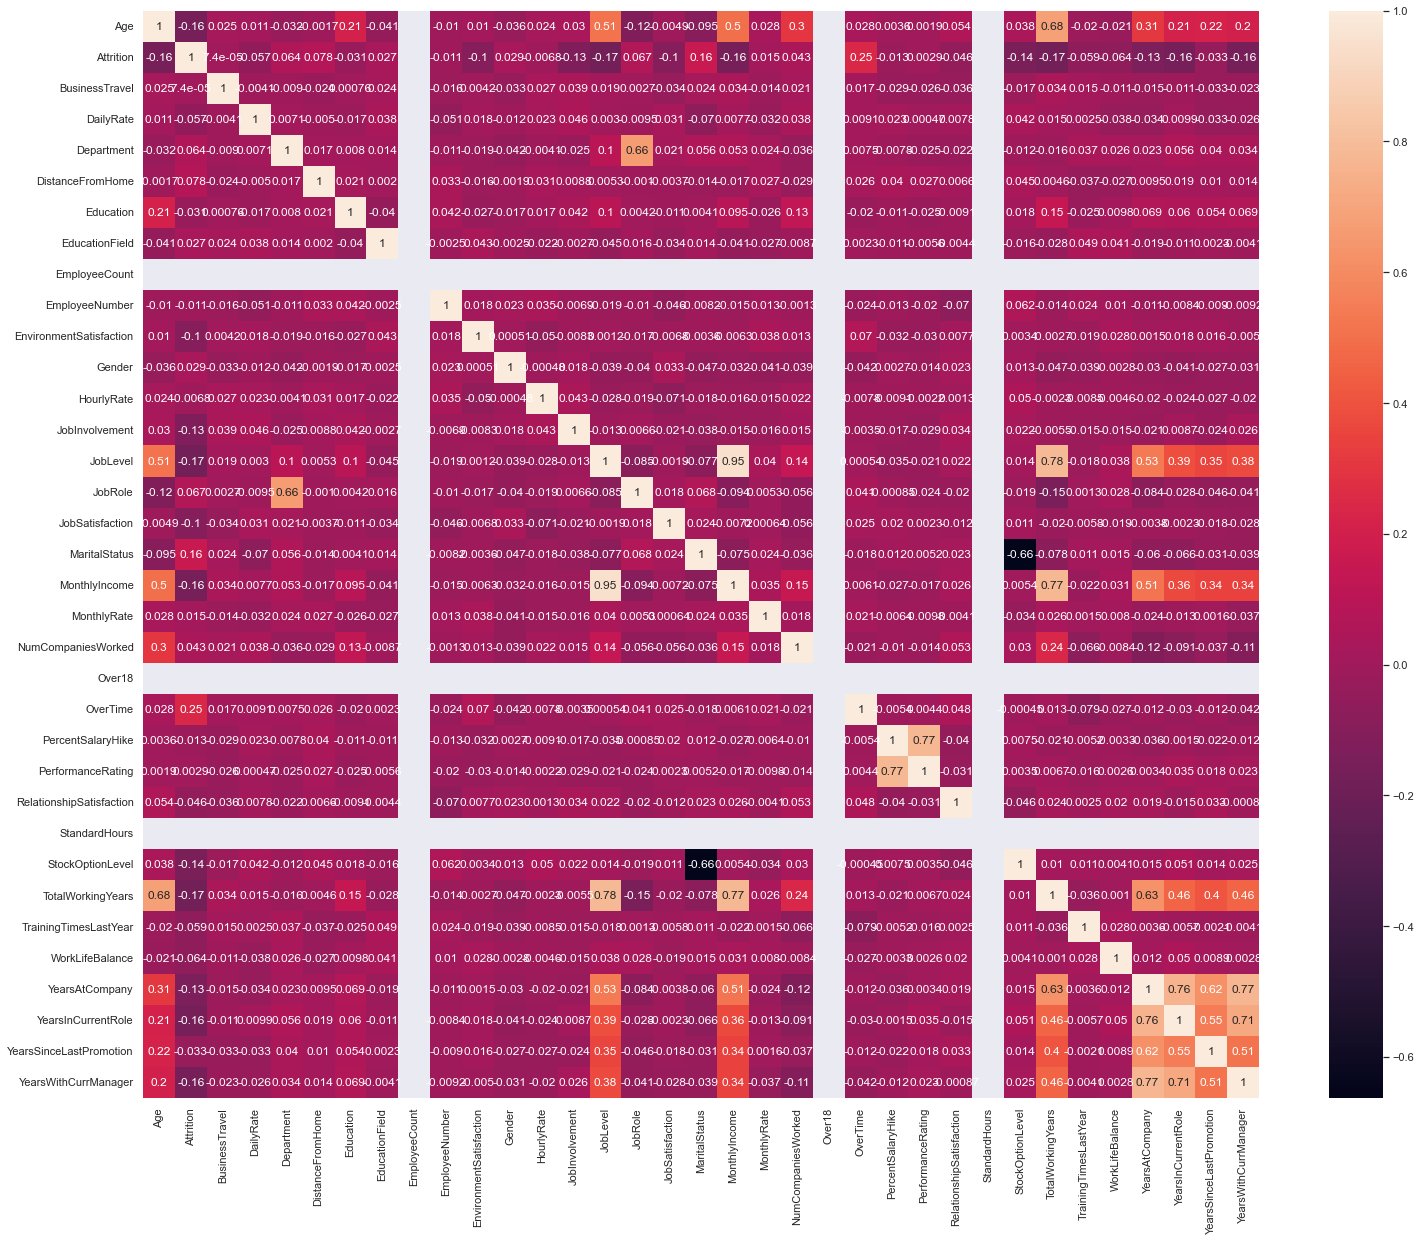

In [15]:
plt.figure()                                             #heatmap displaying correlation among all attributes.
cor = df.corr()
fig = plt.gcf()
fig.set_size_inches(25,20)
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(cor,annot=True)

In [16]:
df1 = df.loc[:,['Attrition','OverTime', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome','MaritalStatus', 'TotalWorkingYears']]

In [17]:
X1 = df1.drop(columns='Attrition',axis=1)
Y1= df1['Attrition']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X1,Y1,test_size = 0.20,random_state = 235)

In [19]:
stump = tree.DecisionTreeClassifier(max_depth=1)

In [20]:
clf = ensemble.AdaBoostClassifier(base_estimator = stump, algorithm="SAMME", n_estimators=6, random_state=0)
clf = clf.fit(X_train, y_train)

In [21]:
y_test_predicted = clf.predict(X_test)

In [22]:
accuracy_score(y_test,y_test_predicted)

0.8435374149659864

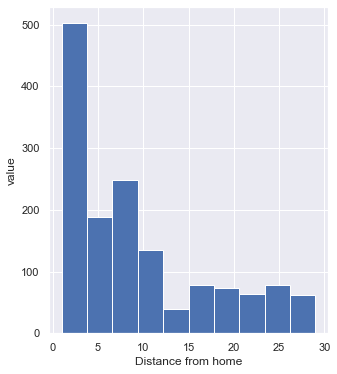

In [23]:
df['DistanceFromHome'].hist(figsize = (5, 6))  
plt.xlabel('Distance from home')
plt.ylabel('value')
plt.show()

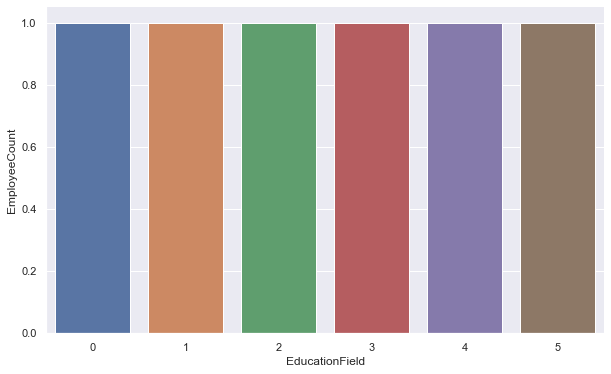

In [24]:
plt.figure(figsize=(10,6))
X= df['EducationField']
Y = df['EmployeeCount']
sns.barplot(data=df,x='EducationField', y='EmployeeCount')
sns.despine()
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc

In [26]:
f=f1_score(y_test,y_test_predicted)

In [1]:
precision_score(y_test,y_test_predicted)

NameError: name 'precision_score' is not defined

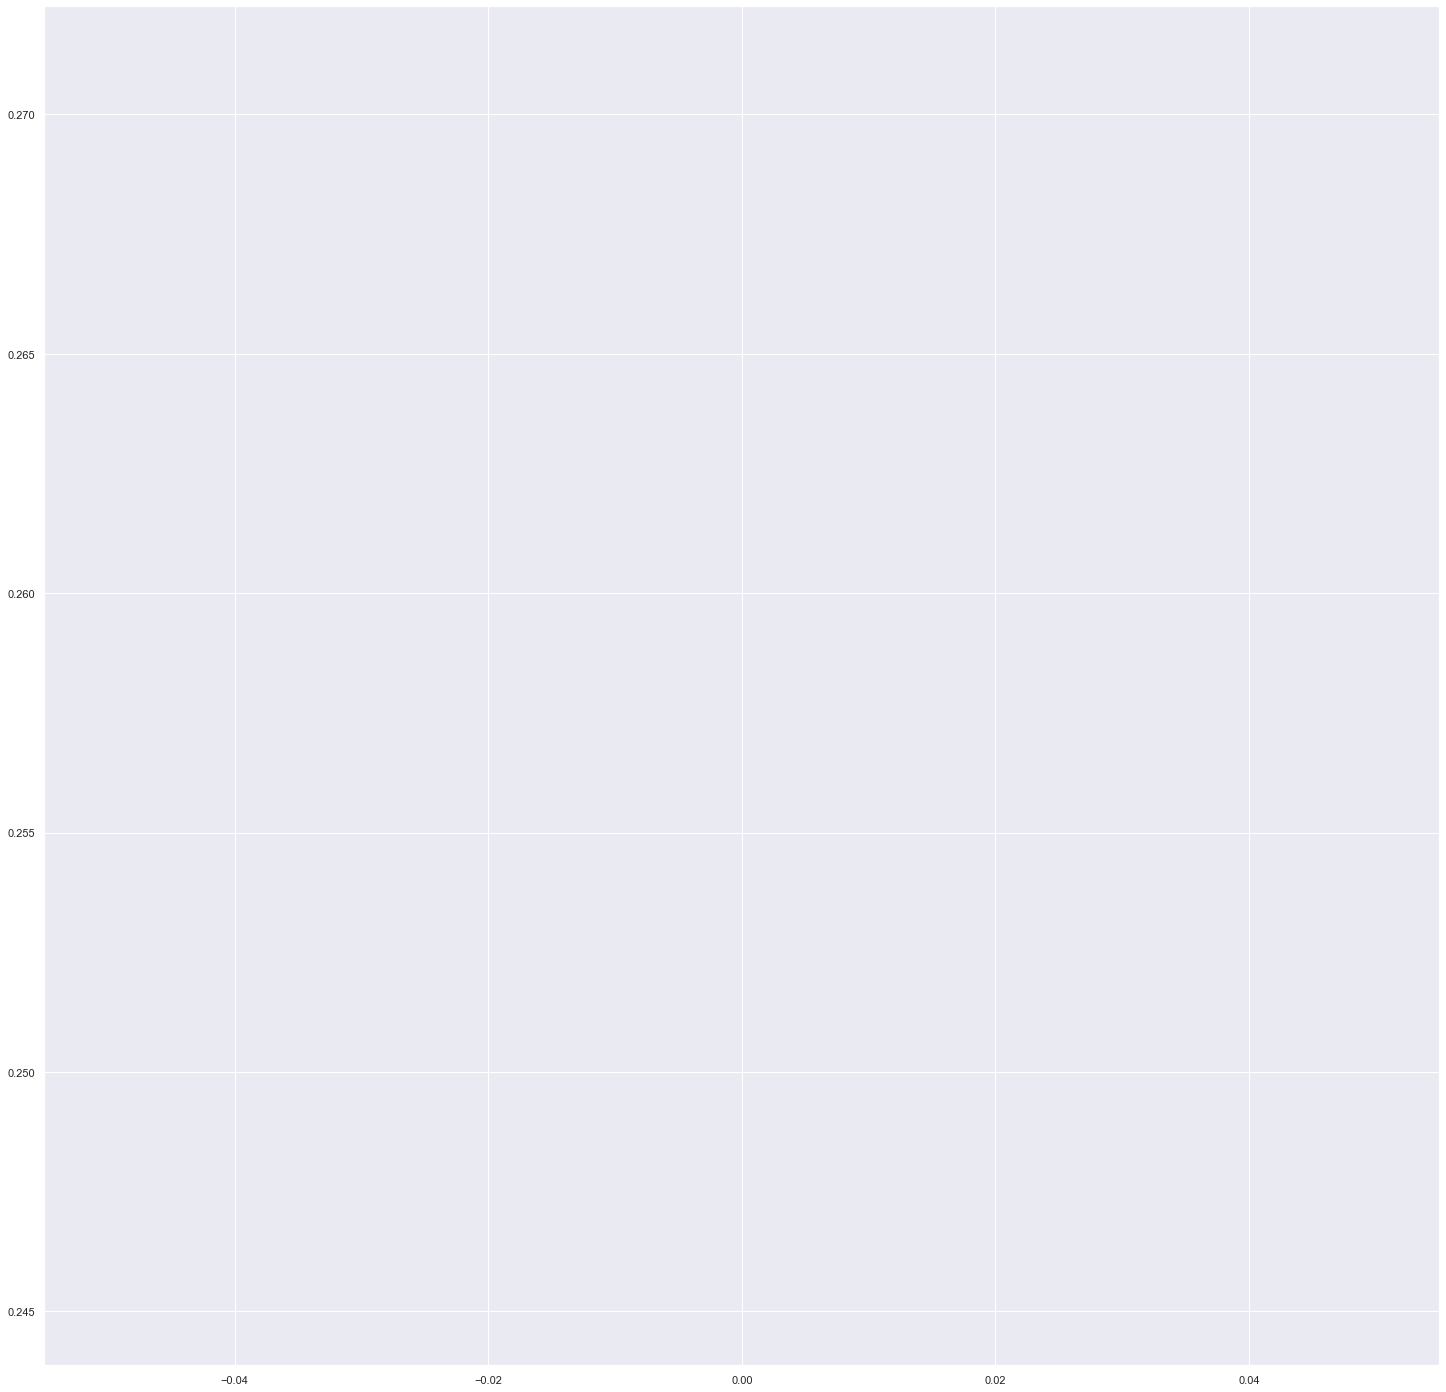

In [28]:
plt.plot(f)
plt.show()

<Figure size 360x432 with 0 Axes>

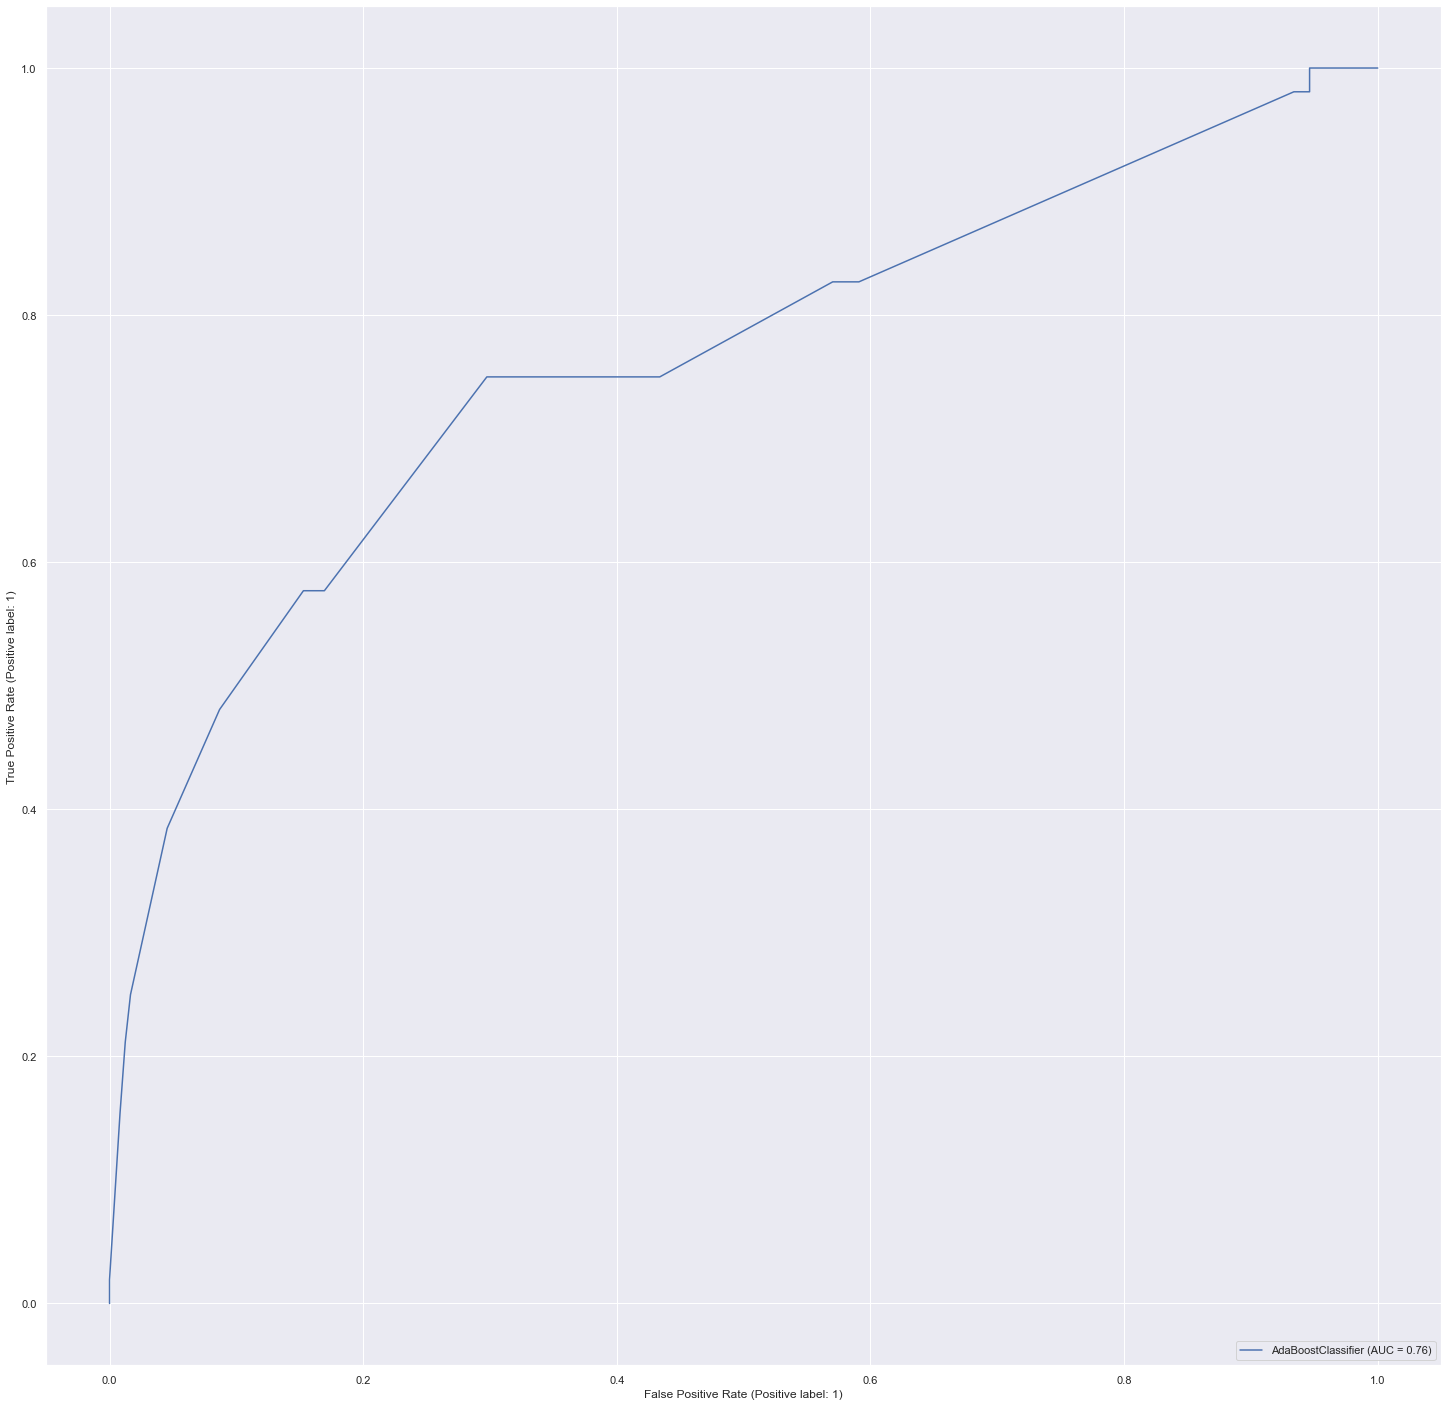

<Figure size 144x144 with 0 Axes>

In [33]:
plt.figure(figsize=(5,6))
plot_roc_curve(clf,X_test, y_test)
plt.figure(figsize=(2,2))
plt.show()  

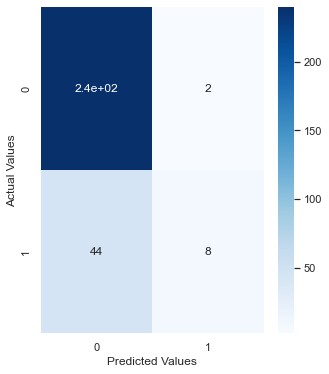

In [34]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,6)) 
cm= confusion_matrix(y_test, y_test_predicted)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()